In [1]:
import altair as alt
import pandas as pd
import numpy as np
import python_cpp_example
from python_cpp_example.itklmcostfunc import CLMCostFunction
from python_cpp_example.itklmcostfunc import CLM3ParamSatRecovery
from python_cpp_example.itklm import MinLMCostFunction
from python_cpp_example.itklmcostfunc import getValue
import pprint

In [2]:
# enable the renderer for notebook
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
# Get the X and the Y values 
#YValues = [ 753.0, 606.0, 480.0, 133.0, 432.0, 490.0, 743.0, 760.0, 756.0 ,874.0, 901.0]

#XValues = [ 134.0, 214.0, 294.0, 1121.0, 1194.0, 1248.0, 2095.0, 2170.0, 2202.0, 3125.0, 4033.0]

#YValues1 = [ -717.0, -749.0, -737.0, -292.0, -158.0, 124.0, 504.0, 322.0, 422.0 ,560.0, 714.0]

#XValues1 = [ 134.0, 214.0, 294.0, 2293.0, 1348.0, 1442.0, 3505.0, 2477.0, 2624.0, 3804.0, 4955.0]

YValues = [ 434.0, 709.0, 853.0, 638.0, 640.0, 576.0, 556.0, 534.0, 570.0, 512.0, 536.0]

XValues = [ 134.0, 214.0, 294.0, 1348.0, 1442.0, 2293.0, 2477.0, 2624.0, 3505.0, 3804.0, 4955.0]

In [4]:
FitParams = [ YValues[-1] , 1000.0, 2.0]
dResidue = 0.0
iNiterations = 0
iReturnCode = -1
cf = CLMCostFunction()
cf.setup(11)
rval = MinLMCostFunction(cf, XValues, YValues, FitParams, dResidue, iNiterations, iReturnCode, 1E-4, 1E-3)
print(rval)
FittedSignals = YValues - getValue(cf,rval[1])



(True, [343.3577849183058, 7466.038643572976, -0.9531866802048135], 0.7839329537606746, 15, 1)


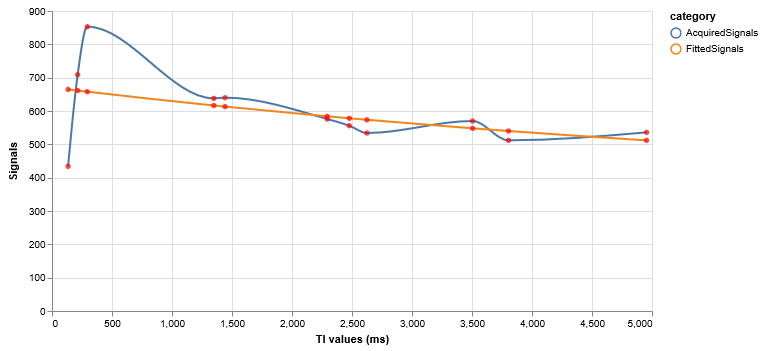

In [5]:
## Plot it 
## have to convert to a pandas dataframe
data_tuples = list(zip(XValues,YValues,FittedSignals))
olddata = pd.DataFrame(data_tuples, columns=['TI','AcquiredSignals','FittedSignals'])
skip_data = olddata.shape[0]
olddata = olddata.reset_index().melt('TI', var_name='category', value_name='Signals')
data = olddata[skip_data:]

## First create a selection and choose nearest point on x-value
nearest = alt.selection(type='single', on='mouseover', fields=['TI'], empty = 'none')
## make the line
line = alt.Chart().mark_line(interpolate='monotone').encode(
        x='TI:Q',
        y='Signals:Q',
        color='category:N',
        tooltip=alt.condition(nearest, 'Signals:Q', alt.value(' '))
)

selectors = alt.Chart().mark_point().encode(
    x='XValues:Q',
    opacity = alt.value(0),
).add_selection(
    nearest
)

points = line.mark_point().encode(
    opacity = alt.condition(nearest, alt.value(1), alt.value(0)),
)

points1 = alt.Chart().mark_circle(color='red').encode(
    x=alt.X('TI', axis=alt.Axis(title='TI values (ms)')),
    y=alt.Y('Signals', axis=alt.Axis(title='Signals')),
)

text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text = alt.condition(nearest, 'Signals:Q', alt.value(' ')),
)

rules = alt.Chart().mark_rule(color='gray').encode(
    x = 'TI:Q',
).transform_filter(
    nearest
)
alt.layer(line,selectors,points,points1,rules,text, data=data, width=600, height=300)


In [6]:
## The top values of the list in YValues are negative but the DICOM only saves positive values.
## We update the YValues with a list of list where the leading values are changed to negative one at a time

YValues_mat = [[-a if idx <= row else a for idx, a in enumerate(YValues)] for row in range(len(YValues))]

sz = YValues_mat

print('\n'.join([ str(myelement) for myelement in sz ]))

[-434.0, 709.0, 853.0, 638.0, 640.0, 576.0, 556.0, 534.0, 570.0, 512.0, 536.0]
[-434.0, -709.0, 853.0, 638.0, 640.0, 576.0, 556.0, 534.0, 570.0, 512.0, 536.0]
[-434.0, -709.0, -853.0, 638.0, 640.0, 576.0, 556.0, 534.0, 570.0, 512.0, 536.0]
[-434.0, -709.0, -853.0, -638.0, 640.0, 576.0, 556.0, 534.0, 570.0, 512.0, 536.0]
[-434.0, -709.0, -853.0, -638.0, -640.0, 576.0, 556.0, 534.0, 570.0, 512.0, 536.0]
[-434.0, -709.0, -853.0, -638.0, -640.0, -576.0, 556.0, 534.0, 570.0, 512.0, 536.0]
[-434.0, -709.0, -853.0, -638.0, -640.0, -576.0, -556.0, 534.0, 570.0, 512.0, 536.0]
[-434.0, -709.0, -853.0, -638.0, -640.0, -576.0, -556.0, -534.0, 570.0, 512.0, 536.0]
[-434.0, -709.0, -853.0, -638.0, -640.0, -576.0, -556.0, -534.0, -570.0, 512.0, 536.0]
[-434.0, -709.0, -853.0, -638.0, -640.0, -576.0, -556.0, -534.0, -570.0, -512.0, 536.0]
[-434.0, -709.0, -853.0, -638.0, -640.0, -576.0, -556.0, -534.0, -570.0, -512.0, -536.0]


In [7]:
def data_mat(Y_mat, X):
    szY = len(Y_mat)
    l = []
    master_tuples = None
    category = 'category'
    signals = 'signals'
    for i in range(szY):
        FitParams = [ Y_mat[i][-1] , 1000.0, 1.0]
        dResidue = 0.0
        iNiterations = 0
        iReturnCode = -1
        cf = CLMCostFunction()
        cf.setup(11)
        ID = [i+1]*11
    
        rval = MinLMCostFunction(cf, XValues, Y_mat[i], FitParams, dResidue, iNiterations, iReturnCode, 1E-4, 1E-3)
        print(rval)
        FittedSignals = Y_mat[i] - getValue(cf,rval[1])
        error = [rval[2]]*11
        data_tuples = list(zip(ID,error,XValues,Y_mat[i],FittedSignals))
        
        olddata = pd.DataFrame(data_tuples, columns=['ID', 'error', 'TI','AcquiredSignals','FittedSignals'])
        skip_data = olddata.shape[0]
        olddata = olddata.reset_index().melt(['TI','ID', 'error'], var_name=category, value_name=signals)
        data = olddata[skip_data:]
        
        if i is 0:
            master_tuples = pd.concat([master_tuples,data], axis = 1 )
        else:
            master_tuples = pd.concat([master_tuples,data], axis = 0 )
        #master_tuples =  pd.merge(master_tuples, data, on='TI')
    return master_tuples

In [8]:
full_tuples = data_mat(YValues_mat, XValues)
#print(full_tuples)

(True, [612.5370851161482, 12.154168885148138, 104806.20950049449], 0.08905738874421143, 96, 1)
(True, [586.9656729421665, 129.17246127161823, 5.741313083592429], 0.3572496450281555, 14, 1)
(True, [602.7879726348599, 589.156284797718, 2.8854289324987166], 0.11281037880494575, 10, 1)
(True, [705.379418462672, 1431.737905700867, 2.254210110206315], 0.267039003744415, 9, 1)
(True, [1209.9017708605006, 3239.862199536699, 1.7233542352272053], 0.25177179652690357, 8, 1)
(True, [3513.852564031356, 10830.674597288657, 1.2377715773715474], 0.3112620991446346, 16, 1)
(True, [63114.600649489046, 204454.69171632317, 1.013561945634273], 0.3254243816384046, 45, 1)
(True, [142078.41756347223, 495736.7944104804, 1.006369309883222], 0.3153844610952917, 65, 1)
(True, [115144.62524560174, 517146.8044813203, 1.0075955015166262], 0.4352093628099415, 69, 1)
(True, [71384.81251985485, 466734.5367223672, 1.0115134757296467], 0.5401777273255548, 76, 1)
(True, [-358.1711296768137, 7016.448642244946, -0.87601175

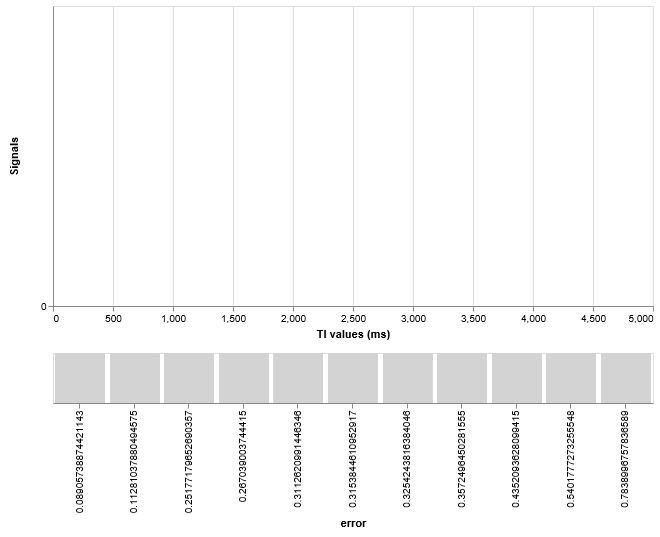

In [9]:
# Data is prepared, now make a chart

selector = alt.selection_single(empty='none', fields=['ID'])
nearest = alt.selection(type='single', on='mouseover', fields=['TI'], empty = 'none')

base = alt.Chart(full_tuples).properties(
    width=600,
    height=300
).add_selection(selector)

points = base.mark_rect(filled=True, size=200).encode(
    x='error:O',
    #y='id:O',
    color=alt.condition(selector, 'ID:O', alt.value('lightgray'), legend=None),
).properties(
    width = 600,
    height = 50
).interactive()

line = base.mark_line(interpolate='monotone').encode(
    x='TI:Q',
    y='signals:Q',
    color=alt.Color('category:N', legend=None),
    tooltip=alt.condition(nearest, 'signals:Q', alt.value(' '))
).transform_filter(
    selector
)

points1 = alt.Chart(full_tuples).mark_circle(color='red').encode(
    x=alt.X('TI:Q', axis=alt.Axis(title='TI values (ms)')),
    y=alt.Y('signals:Q', axis=alt.Axis(title='Signals')),
).transform_filter(selector)

selectors = alt.Chart(full_tuples).mark_point().encode(
    x='TI:Q',
    opacity = alt.value(0),
).add_selection(
    nearest
)

points2 = alt.Chart(full_tuples).mark_point().encode(
    x='TI:Q',
    y='signals:Q',
    opacity = alt.condition(nearest, alt.value(1), alt.value(0)),
).transform_filter(
    selector
)

rules = alt.Chart(full_tuples).mark_rule(color='gray').encode(
    x = 'TI:Q',
    opacity = alt.condition(nearest, alt.value(1), alt.value(0)),
).transform_filter(
    selector
)

text = points2.mark_text(align='left', dx=5, dy=-5).encode(
    text = alt.condition(nearest, 'signals:Q', alt.value(' ')),
)

(line+selectors+points2+points1+rules+text) & points

In [10]:
rval


(True,
 [343.3577849183058, 7466.038643572976, -0.9531866802048135],
 0.7839329537606746,
 15,
 1)